In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/Airlines.csv")

In [3]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269.0,SFO,IAH,3.0,15.0,205.0,1.0
1,2,US,1558.0,PHX,CLT,3.0,15.0,222.0,1.0
2,3,AA,2400.0,LAX,DFW,3.0,20.0,165.0,1.0
3,4,AA,2466.0,SFO,DFW,3.0,20.0,195.0,1.0
4,5,AS,108.0,ANC,SEA,3.0,30.0,202.0,0.0


In [4]:
df.tail()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
155097,155098,WN,1047.0,LAS,SNA,4.0,1250.0,65.0,0.0
155098,155099,WN,1138.0,SJC,PDX,4.0,1250.0,105.0,1.0
155099,155100,WN,1498.0,RNO,LAS,4.0,1250.0,70.0,1.0
155100,155101,WN,180.0,SFO,LAX,4.0,1250.0,75.0,1.0
155101,155102,WN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.drop(['id'], axis = 1, inplace = True)

# Removing Duplicates and handling null values

In [6]:
#df.drop_duplicates(inplace = True)

In [7]:
df.describe()

,Flight,DayOfWeek,Time,Length,Delay
count,155101.000000,155101.000000,155101.000000,155101.000000,155101.000000
mean,2438.732432,3.835849,800.267413,130.384691,0.341932
std,2076.057812,1.778808,274.220226,69.065436,0.474358
min,1.000000,1.000000,10.000000,23.000000,0.000000
25%,730.000000,3.000000,565.000000,80.000000,0.000000
50%,1800.000000,4.000000,795.000000,114.000000,0.000000
75%,3762.000000,5.000000,1030.000000,160.000000,1.000000
max,7813.000000,7.000000,1439.000000,655.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155102 entries, 0 to 155101
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Airline      155102 non-null  object 
 1   Flight       155101 non-null  float64
 2   AirportFrom  155101 non-null  object 
 3   AirportTo    155101 non-null  object 
 4   DayOfWeek    155101 non-null  float64
 5   Time         155101 non-null  float64
 6   Length       155101 non-null  float64
 7   Delay        155101 non-null  float64
dtypes: float64(5), object(3)
memory usage: 9.5+ MB


In [9]:
df.dropna(how = 'any', axis = 0, inplace = True)

No null values remaining, so we can move on to the next step, dealing with Outliers.

# Outliers

While going through the dataset, one can observe that there are certain length values that are 0, which is an anomaly, and hence will be dropped as an outlier, assuming it to be a human error while enetering the data.

In [10]:
print("The number of length=0 tuples are : ", len(df[df["Length"]==0]))
df.drop(df[df["Length"]==0].index, inplace = True)
print("Dropped")

The number of length=0 tuples are :  0
Dropped


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155101 entries, 0 to 155100
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Airline      155101 non-null  object 
 1   Flight       155101 non-null  float64
 2   AirportFrom  155101 non-null  object 
 3   AirportTo    155101 non-null  object 
 4   DayOfWeek    155101 non-null  float64
 5   Time         155101 non-null  float64
 6   Length       155101 non-null  float64
 7   Delay        155101 non-null  float64
dtypes: float64(5), object(3)
memory usage: 14.7+ MB


Since I am not privy to the measurement standards used for the dataset, as this information was not available, I am not in a position to make any well-informed assumptions about the observations represented by the data and its distribution.

Hence, I will avoid removing any additional data basing it as an outlier, and accepting it as part of the natural distribution from which the data was collected and which the data represents.


# Visualizations and Inferences

We will create two new dataframes, one containing all the data in our feature columns, and the other to store the corresponding data in our target column, "Delay", which has binary categorical data, represented by 1's and 0's.

In [12]:
x_df = df.drop(["Delay"], axis = 1)
y_df = df["Delay"]

Let's just take a peek at the number of unique values in each category.

In [13]:
for col in x_df.columns:
  print(f"{col}: {x_df[col].nunique()}")

Airline: 18
Flight: 6345
AirportFrom: 290
AirportTo: 290
DayOfWeek: 7
Time: 1086
Length: 417


Let's try and answer a few interesting questions about our data:


1. What source airports contribute more/less towards the delays ? 
2. On what day of the week are we more/less likely to see a delay ?
3. Which airline has the most delays ?



Before we answer the questions, we'll create two dataframes, one that only has delayed flights, and the other that has none.


In [14]:
df_delay = df[df["Delay"]==1]
df_no_delay = df[df["Delay"]==0]

print(df_delay.shape)
print(df_no_delay.shape)

(53034, 8)
(102067, 8)


*Question 1: What source airports contribute more/less towards the delays ?*

(I will just be considering the top 10 for each)

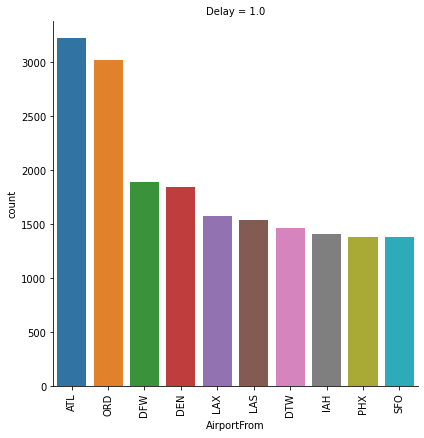

In [15]:
g = sns.catplot(x="AirportFrom", col="Delay",
                data=df_delay, kind="count",
                height=6,  order = df_delay['AirportFrom'].value_counts()[:10].index.tolist())
g.set_xticklabels(rotation = 90)

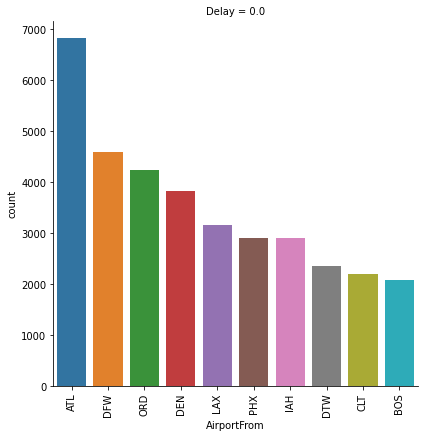

In [16]:
g = sns.catplot(x="AirportFrom", col="Delay",
                data=df_no_delay, kind="count",
                height=6,  order = df_no_delay['AirportFrom'].value_counts()[:10].index.tolist())
g.set_xticklabels(rotation = 90)

*Question 2: On what day of the week are we more/less likely to see a delay ?*

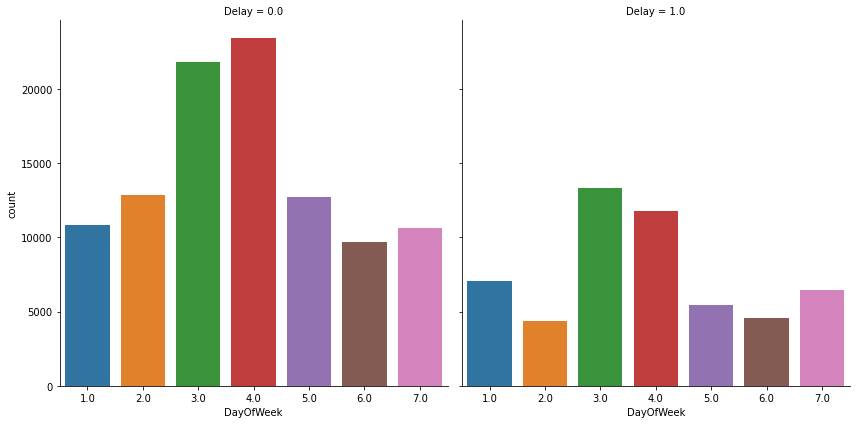

In [17]:
g = sns.catplot(x="DayOfWeek", col="Delay",
                data=df, kind="count",
                height=6)

*Question 3: Which airline has the most delays ?*

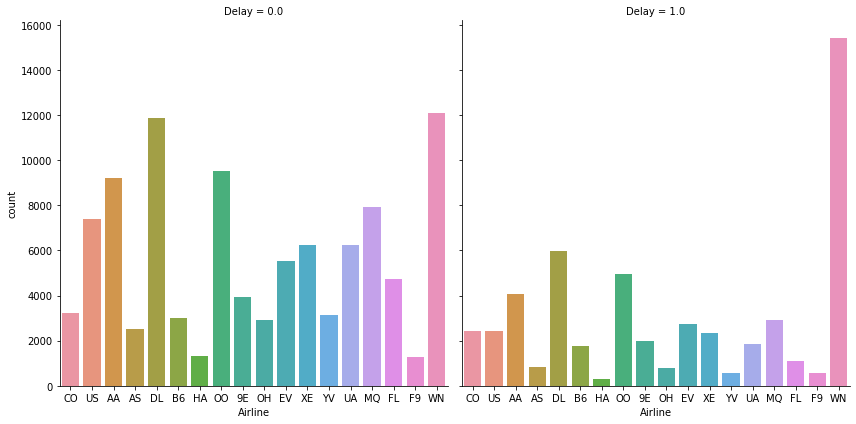

In [18]:
 g = sns.catplot(x="Airline", col="Delay",
                data=df, kind="count",
                height=6)

Let's take a look into which airline and departure airport pairing results in the most delays.


In [19]:
grouped_df = df_delay.groupby(['Airline', 'AirportFrom']).size().reset_index(name="Count").sort_values("Count", ascending = False)
print(grouped_df[:10])

     Airline AirportFrom  Count
335       DL         ATL   1611
1157      WN         MDW   1268
128       AA         DFW   1258
1149      WN         LAS   1182
438       EV         ATL   1001
1131      WN         BWI    890
1170      WN         PHX    858
298       CO         IAH    814
746       MQ         ORD    741
1061      US         CLT    723


Also, let's find the top 10 airport pairings with respect to delayed flights.

In [20]:
grouped_df_air_pairs = df_delay.groupby(['AirportFrom', 'AirportTo']).size().reset_index(name="Count").sort_values("Count", ascending = False)
print(grouped_df_air_pairs[:10])

     AirportFrom AirportTo  Count
2057         LAX       SFO    132
822          DAL       HOU    121
3498         SFO       LAX    119
2843         ORD       LGA    118
152          ATL       LGA    107
1559         HOU       DAL    106
2030         LAX       LAS    105
2814         ORD       DFW    104
2779         ORD       ATL     93
2841         ORD       LAX     92


Next, we check out the time taken by airlines for any journey.

In [21]:
df_avg = df.groupby(['AirportFrom', 'AirportTo'], axis = 0).agg(time_mean = ('Time', 'mean'),
                                                                length_mean = ('Length', 'mean'))

In [22]:
df_avg


time_mean  length_mean
AirportFrom AirportTo                          
ABE         ATL         395.000000   145.000000
            CLT         525.000000   106.000000
            DTW         694.038462   113.346154
            FLL         718.400000   178.000000
            MCO        1124.666667   156.000000
...                            ...          ...
YAK         CDV         721.000000    52.000000
            JNU        1110.000000    48.000000
YUM         IPL        1393.375000    27.000000
            LAX         800.742857    79.314286
            PHX         755.094340    66.433962

[4059 rows x 2 columns]

In [23]:
df_avg['speed_mean'] = df_avg['length_mean']/df_avg['time_mean']

In [24]:
df_avg

time_mean  length_mean  speed_mean
AirportFrom AirportTo                                      
ABE         ATL         395.000000   145.000000    0.367089
            CLT         525.000000   106.000000    0.201905
            DTW         694.038462   113.346154    0.163314
            FLL         718.400000   178.000000    0.247773
            MCO        1124.666667   156.000000    0.138708
...                            ...          ...         ...
YAK         CDV         721.000000    52.000000    0.072122
            JNU        1110.000000    48.000000    0.043243
YUM         IPL        1393.375000    27.000000    0.019377
            LAX         800.742857    79.314286    0.099051
            PHX         755.094340    66.433962    0.087981

[4059 rows x 3 columns]

In [25]:
df_avg = df_avg.reset_index().sort_values(by = ['speed_mean'], ascending = False).reset_index()

In [26]:
df_avg.drop(['index'], axis = 1, inplace = True)

In [27]:
df_avg

,AirportFrom,AirportTo,time_mean,length_mean,speed_mean
0,ANC,SLC,85.000000,270.000000,3.176471
1,ANC,PHX,113.000000,327.000000,2.893805
2,BQN,EWR,165.000000,245.142857,1.485714
3,ATL,HNL,650.000000,620.000000,0.953846
4,MCO,SFO,396.777778,369.000000,0.929992
...,...,...,...,...,...
4054,GRB,MQT,1195.000000,40.000000,0.033473
4055,CWA,EAU,1401.000000,38.000000,0.027123
4056,CEC,ACV,1093.625000,28.000000,0.025603
4057,IDA,PIH,990.000000,25.000000,0.025253


Let's take a look at the 10 quickest flight paths and slowest flight paths

In [28]:
fig = px.scatter(
      df_avg[:10],
      x = "speed_mean",
      y = "time_mean",
      hover_data = ["AirportFrom", "AirportTo", "length_mean"]
  )

fig.show()


In [29]:
fig = px.scatter(
      df_avg[-10:],
      x = "speed_mean",
      y = "time_mean",
      hover_data = ["AirportFrom", "AirportTo", "length_mean"]
  )

fig.show()

**Distributions**

In [30]:
# NUMERIC FEATURES:
numeric_data = x_df.select_dtypes(include=np.number) # select_dtypes selects data with numeric features
numeric_col = list(numeric_data.columns )
print(numeric_col)

['Flight', 'DayOfWeek', 'Time', 'Length']


In [31]:
categorical_data = x_df.select_dtypes(exclude=np.number) # we will exclude data with numeric features
categorical_col = list(categorical_data.columns)
print(categorical_col)

['Airline', 'AirportFrom', 'AirportTo']


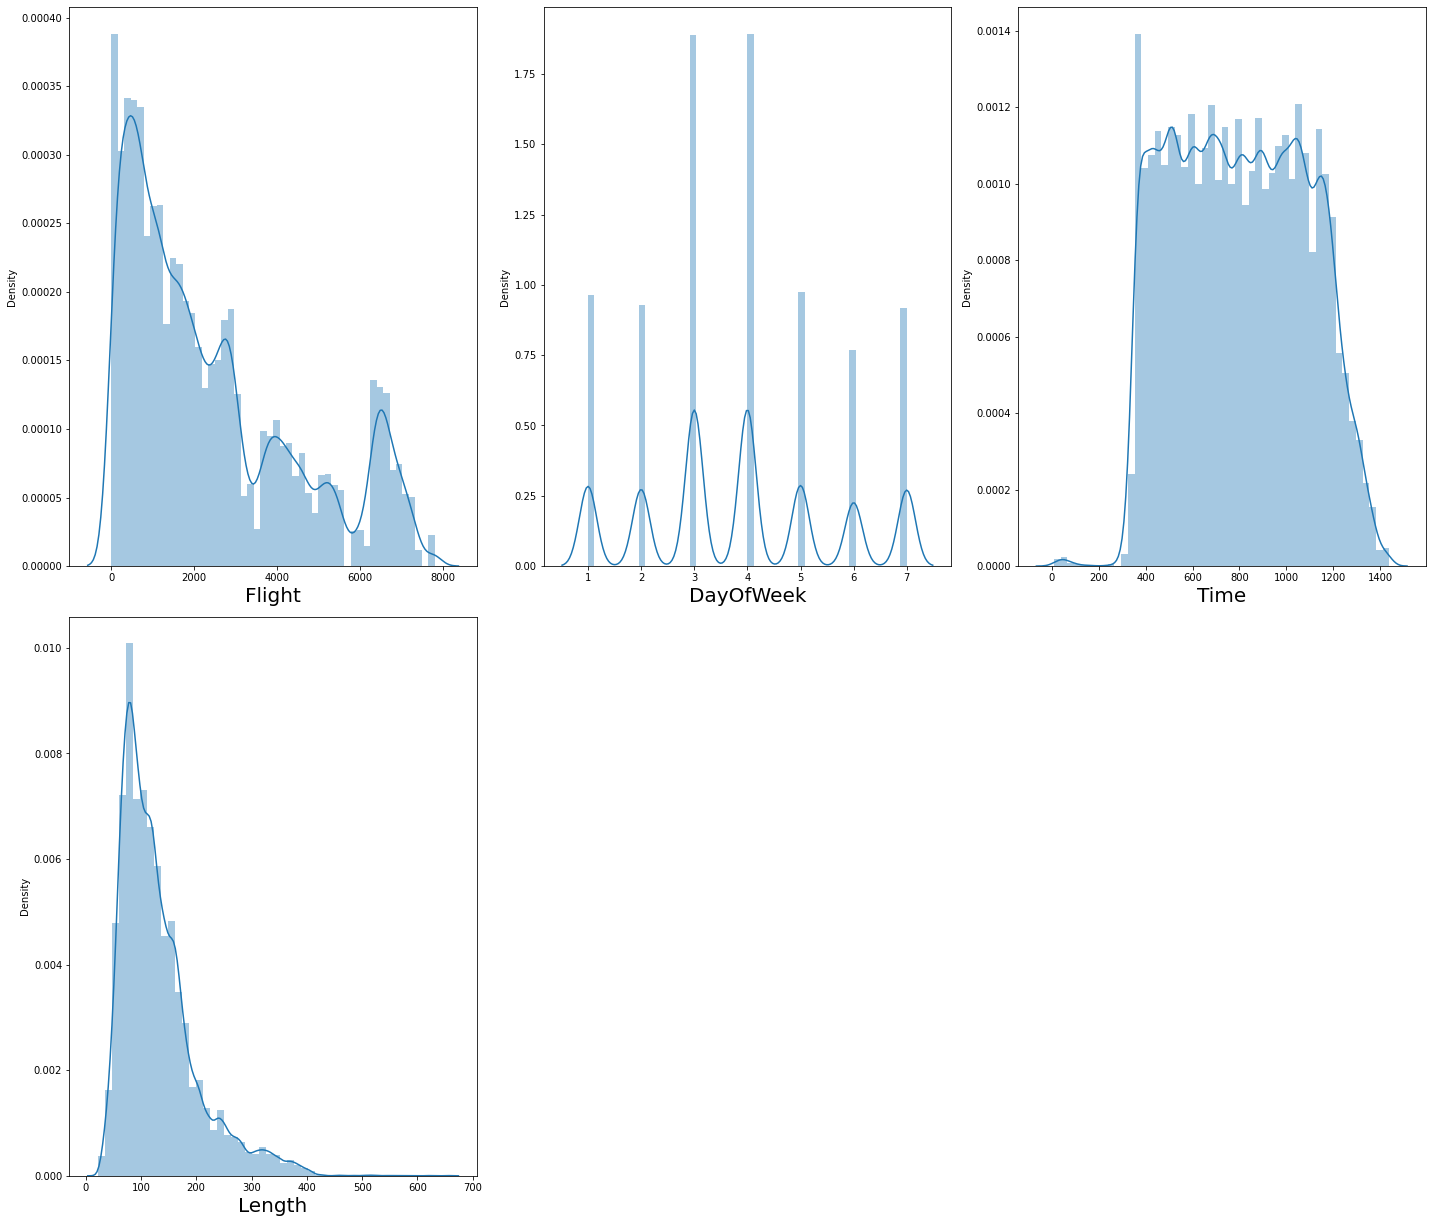

In [32]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numeric_data:
    if plotnumber<=16 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

The time data looks to be resembling a normal distribution in a vague way, and the day of the week column is a numerical encoding thay represents days of the week, while also being fairly equally distributed.

Hence, we will check the skew for the remaining columns and try to transform them in a way that minimises the skew.

In [33]:
print("Skew for the Flight column : ", df['Flight'].skew())
print("Skew for the Length column : ", df['Length'].skew())

Skew for the Flight column :  0.8725449486579285
Skew for the Length column :  1.5278572105190331


*Log Transform*

In [34]:
new_flight_log = np.log(x_df['Flight'])
new_length_log = np.log(x_df['Length'])


print("Skew for the log transformed Flight column : ", new_flight_log.skew())
print("Skew for the log transformed Length column : ", new_length_log.skew())

Skew for the log transformed Flight column :  -1.3206897891453955
Skew for the log transformed Length column :  0.20082962341778976


*Square root Tranform*

In [35]:
new_flight_sqrt = np.sqrt(x_df['Flight'])
new_length_sqrt = np.sqrt(x_df['Length'])

print("Skew for the log transformed Flight column : ", new_flight_sqrt.skew())
print("Skew for the log transformed Length column : ", new_length_sqrt.skew())

Skew for the log transformed Flight column :  0.20034970852554684
Skew for the log transformed Length column :  0.8423693247489754


It looks like the skew is minimised when we apply the log transform and sqaure root transform to the Flight and Time columns, respectively.

Hence, we apply these transformations to our data.

In [36]:
x_df["Flight"] = np.sqrt(x_df['Flight'])
x_df["Length"] = np.log(x_df['Length'])

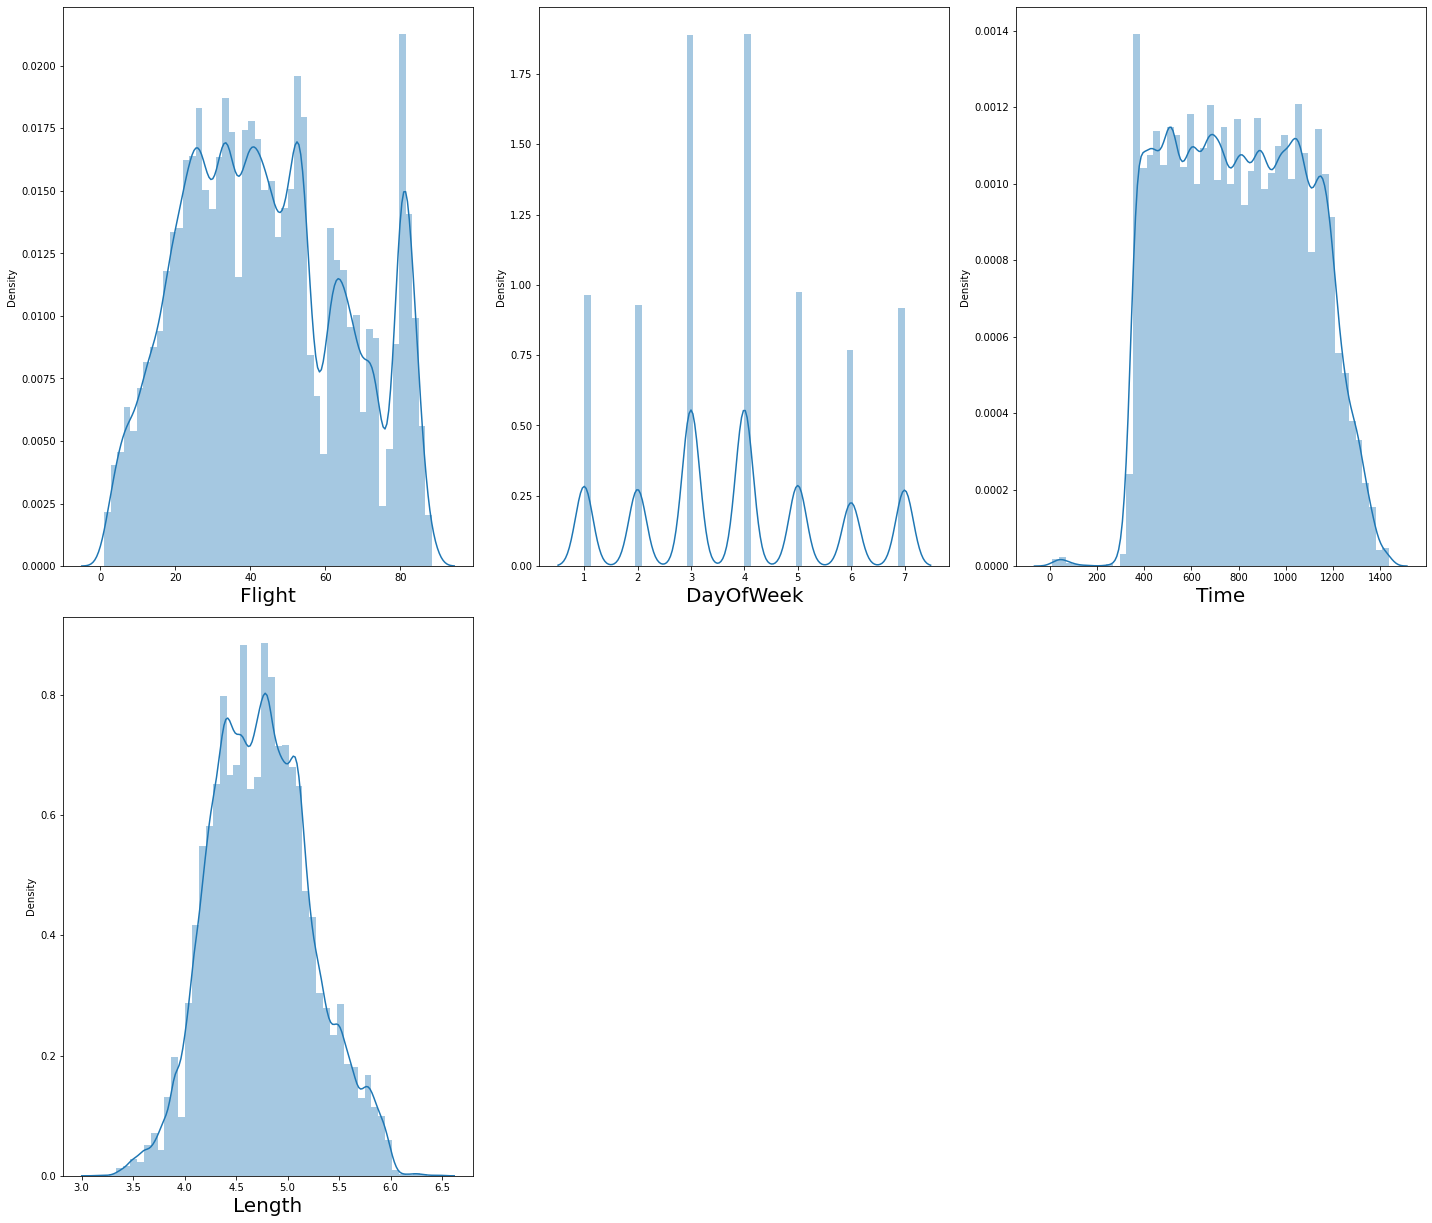

In [37]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numeric_data:
    if plotnumber<=16 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

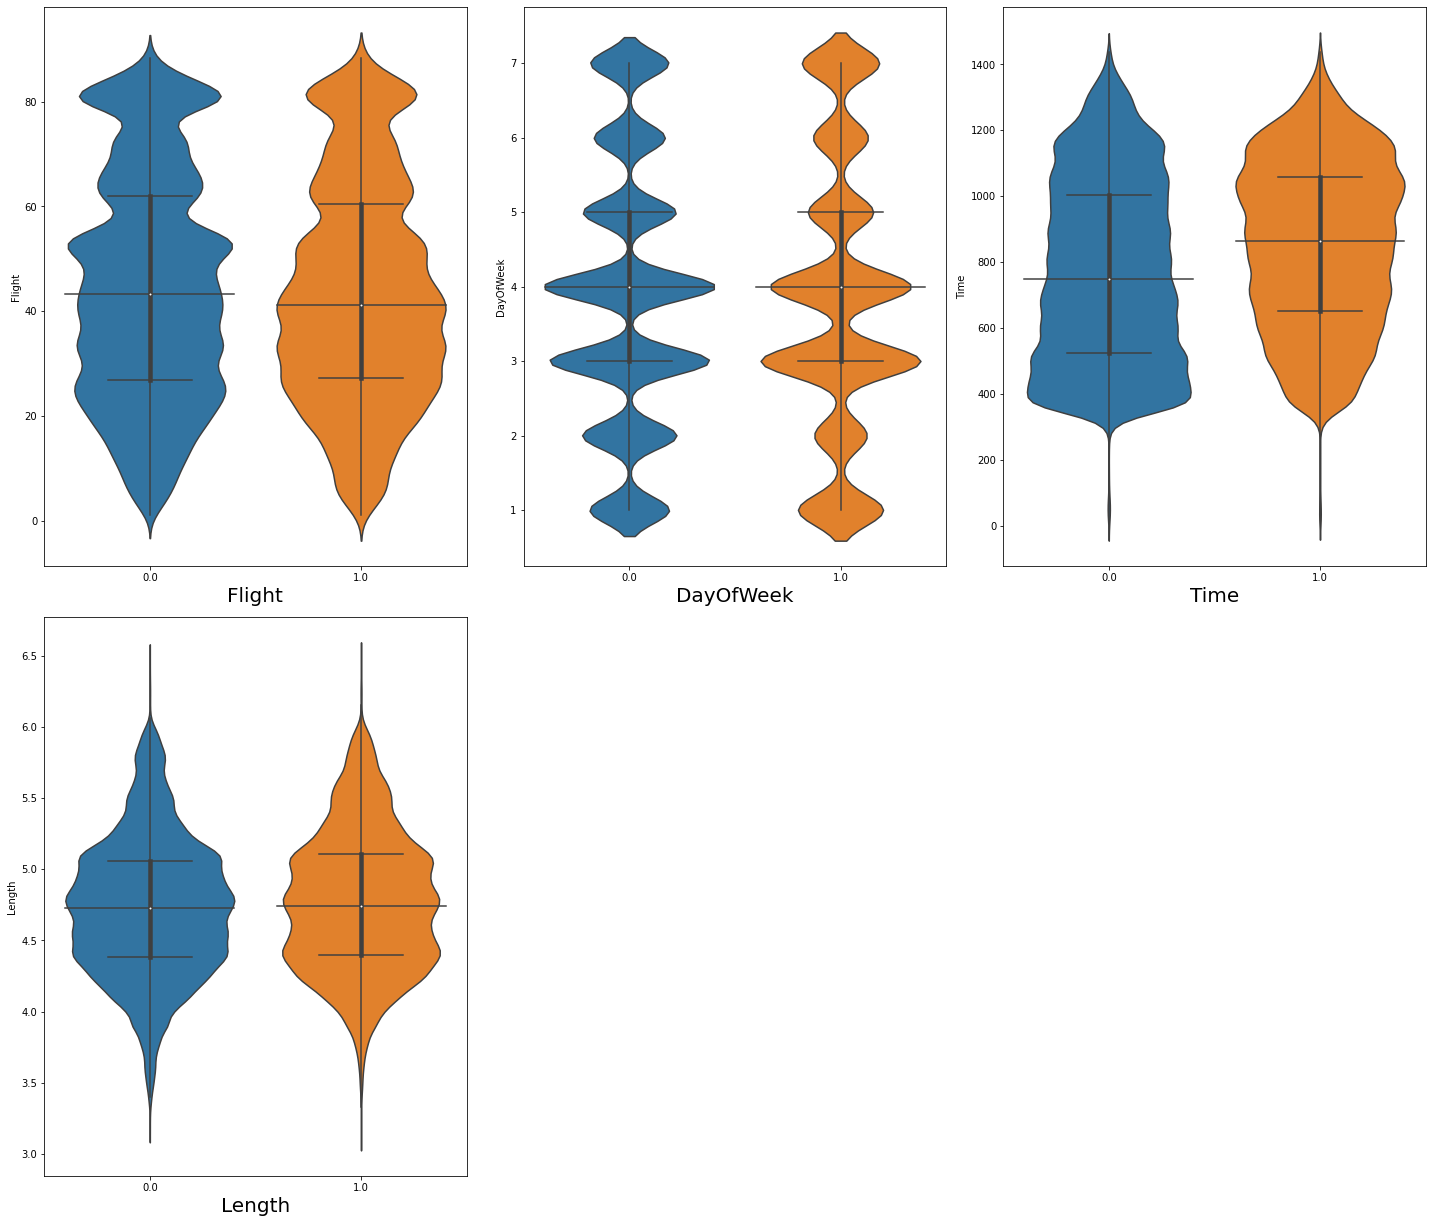

In [38]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numeric_data:
    if plotnumber<=16 :
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(x=y_df, y=column, data=x_df, showfliers=False, showbox=False, whis = [25, 75])
        sns.violinplot(y_df, x_df[column], )
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

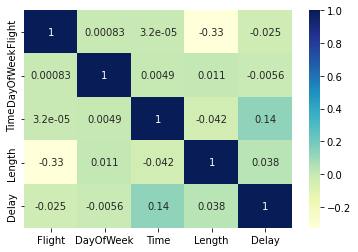

In [39]:
concat = pd.concat([x_df, y_df], axis = 1)

# plotting correlation heatmap
sns.heatmap(concat.corr(), cmap="YlGnBu", annot=True)


# Label encoding

In [40]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le3 = preprocessing.LabelEncoder()

x_df['Airline']= le1.fit_transform(x_df['Airline'])
x_df['AirportFrom']= le2.fit_transform(x_df['AirportFrom'])
x_df['AirportTo']= le3.fit_transform(x_df['AirportTo'])

# Training

Let's just keep a bit of the data aside for testing purposes, shall we? Always nice to have a final check on a model, lest we unabashedly make a fool of ourselves.

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_check, y_train, y_check = train_test_split(x_df, y_df, test_size = 0.10, random_state = 42)

In [42]:
x_val, x_test, y_val, y_test = train_test_split(x_check, y_check, test_size = 0.5, random_state = 42)

We will try multiple algorithms to find out the best fit

1. Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr_base = LogisticRegression(random_state = 0).fit(x_train, y_train)
el_score = []
el_mods = []
for i in range(0, 11):
  lr_elastic = LogisticRegression(random_state = 42).fit(x_train, y_train)
  el_mods.append(lr_elastic)
  el_score.append(lr_elastic.score(x_train, y_train))

In [45]:
print(lr_base.score(x_train, y_train))
print(el_mods)
print(el_score)

0.6545741098932588
[LogisticRegression(random_state=42), LogisticRegression(random_state=42), LogisticRegression(random_state=42), LogisticRegression(random_state=42), LogisticRegression(random_state=42), LogisticRegression(random_state=42), LogisticRegression(random_state=42), LogisticRegression(random_state=42), LogisticRegression(random_state=42), LogisticRegression(random_state=42), LogisticRegression(random_state=42)]
[0.6545741098932588, 0.6545741098932588, 0.6545741098932588, 0.6545741098932588, 0.6545741098932588, 0.6545741098932588, 0.6545741098932588, 0.6545741098932588, 0.6545741098932588, 0.6545741098932588, 0.6545741098932588]


2. Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
clf_1 = RandomForestClassifier(max_depth=6, random_state=0)
clf_1.fit(x_train, y_train)
clf_1.score(x_train, y_train)

0.6942259474174368

In [48]:
from sklearn.metrics import accuracy_score
y_hat_val = clf_1.predict(x_val)
print(accuracy_score(y_hat_val, y_val))

0.689103803997421


3. XGBoost

In [49]:
import xgboost as xgb

In [50]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", max_depth = 5, random_state=42)
xgb_model.fit(x_train, y_train)
print(xgb_model.score(x_train, y_train))

y_hat_val_xgb = xgb_model.predict(x_val)
print(accuracy_score(y_hat_val_xgb, y_val))

0.7094419371015116
0.7061250805931657


4. AdaBoost

In [51]:
from sklearn.ensemble import AdaBoostClassifier

In [52]:
clf_ada_1 = AdaBoostClassifier(n_estimators=200, learning_rate = 0.5, random_state=0)
clf_ada_1.fit(x_train, y_train)
print(clf_ada_1.score(x_train, y_train))

y_hat_val_ada = clf_ada_1.predict(x_val)
print(accuracy_score(y_hat_val_ada, y_val))

0.6964467368722688
0.6950354609929078


5. Neural Networks

In [53]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential() 
model.add(Dense(1280, activation='relu', input_dim=7))
model.add(Dense(640, activation='relu'))
model.add(Dense(320, activation='relu'))
model.add(Dense(160, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1280)              10240     
                                                                 
 dense_1 (Dense)             (None, 640)               819840    
                                                                 
 dense_2 (Dense)             (None, 320)               205120    
                                                                 
 dense_3 (Dense)             (None, 160)               51360     
                                                                 
 dense_4 (Dense)             (None, 80)                12880     
                                                                 
 dense_5 (Dense)             (None, 40)                3240      
                                                                 
 dense_6 (Dense)             (None, 20)                8

In [54]:
hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128)


Epoch 1/10
1091/1091 [==============================] - 29s 26ms/step - loss: 0.6715 - accuracy: 0.6432 - val_loss: 0.6399 - val_accuracy: 0.6570
Epoch 2/10
1091/1091 [==============================] - 27s 25ms/step - loss: 0.6342 - accuracy: 0.6573 - val_loss: 0.6335 - val_accuracy: 0.6567
Epoch 3/10
1091/1091 [==============================] - 27s 25ms/step - loss: 0.6312 - accuracy: 0.6579 - val_loss: 0.6328 - val_accuracy: 0.6570
Epoch 4/10
1091/1091 [==============================] - 27s 25ms/step - loss: 0.6303 - accuracy: 0.6571 - val_loss: 0.6311 - val_accuracy: 0.6571
Epoch 5/10
1091/1091 [==============================] - 27s 25ms/step - loss: 0.6292 - accuracy: 0.6577 - val_loss: 0.6371 - val_accuracy: 0.6494
Epoch 6/10
1091/1091 [==============================] - 27s 25ms/step - loss: 0.6284 - accuracy: 0.6578 - val_loss: 0.6291 - val_accuracy: 0.6573
Epoch 7/10
1091/1091 [==============================] - 27s 25ms/step - loss: 0.6284 - accuracy: 0.6574 - val_loss: 0.6285 -

**The best model looks to be the Xgboost one, so we will predict the final test data output using this model.**

In [55]:
y_hat_test_xgb = xgb_model.predict(x_test)
print(accuracy_score(y_hat_test_xgb, y_test))

0.7079680247550284
